In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
FILES_DIR = "/Users/cdesio/Downloads/"

In [3]:
energy_truth = np.loadtxt(os.path.join(FILES_DIR, "True_logE.txt"))
energy_nn = np.loadtxt(os.path.join(FILES_DIR,"predicted_logE.txt"))
energy_reco = np.loadtxt(os.path.join(FILES_DIR,"reco_E.txt"))

en_true_pred = np.vstack((energy_truth, energy_nn))

en_pred_true = np.vstack((energy_nn, energy_truth))

nonzero = np.nonzero(energy_reco)[0]

en_reco_true = np.vstack((np.log10(energy_reco[nonzero]), energy_truth[nonzero]))

en_true_reco = np.vstack((energy_truth[nonzero], np.log10(energy_reco[nonzero])))

In [4]:
en_true_nn = list(zip(energy_truth, energy_nn))
en_true_reco = [(et,np.log10(er)) for et,er  in zip(energy_truth, energy_reco) if er > 0]
en_nn_true = list(zip(energy_nn, energy_truth))
en_reco_true = [(np.log10(er), et) for er,et in zip(energy_reco, energy_truth) if er > 0]

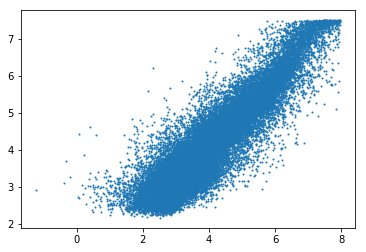

In [5]:
plt.scatter([x[0] for x in en_true_nn], [x[1] for x in en_true_nn], s=1)
plt.show()

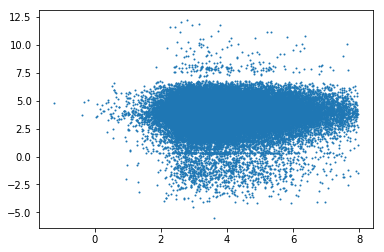

In [6]:
plt.scatter([x[0] for x in en_true_reco], [x[1] for x in en_true_reco], s=1)
plt.show()

In [7]:
def binbounds(lsval, binmin, binmax, clev):
    odata = [(x[1]-x[0]) for x in lsval if binmin <= x[0] < binmax]
    excluded = int(np.floor((1.0 - clev) * len(odata) * 0.5))
    odata.sort()    
    return (0.5*(binmax+binmin),odata[excluded],odata[-excluded])


In [8]:
def plot_performances(values_list, range_ext_1, range_ext_2, coeff = 0.5,  xlabel="True log(Energy(GeV))", ylabel="Predicted log(Energy(GeV))"):
    plt.figure(figsize=(9,7))
    cl_68_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.68) for x in range(range_ext_1,range_ext_2)]
    cl_90_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.90) for x in range(range_ext_1,range_ext_2)]
    median_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0) for x in range(range_ext_1,range_ext_2)]

    line_68_1 = plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"steelblue", label="68% confidence level", alpha=1)
    line_68_2 = plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"steelblue", alpha=1)
    line_90_1 = plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"lightslategray", label="90% confidence level",alpha=1)
    line_90_2 = plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"lightslategray",alpha=1)
    median = plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
    regr_line = plt.plot([2,8],[2,8],"r", label="true")

    plt.fill_between([x[0] for x in cl_68_nn], [x[1]+x[0] for x in cl_68_nn], [x[2]+x[0] for x in cl_68_nn],
                color='cornflowerblue',alpha=0.7)
    plt.fill_between([x[0] for x in cl_90_nn], [x[1]+x[0] for x in cl_90_nn], [x[2]+x[0] for x in cl_90_nn],
                color='lightsteelblue',alpha=0.7)


    #plt.scatter([x[0] for x in values_list], [x[1] for x in values_list], s=1, 
    #            marker='o', color='black', edgecolor='k', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(2,8)
    plt.legend(loc="lower right")
    plt.grid(b=True, which='both', color='0.65', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

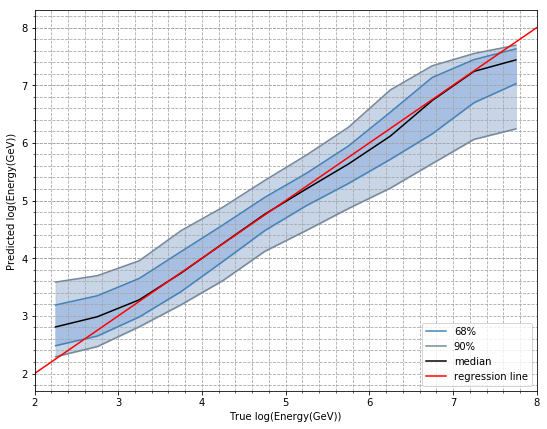

In [40]:
plot_performances(en_true_nn, 4, 16)

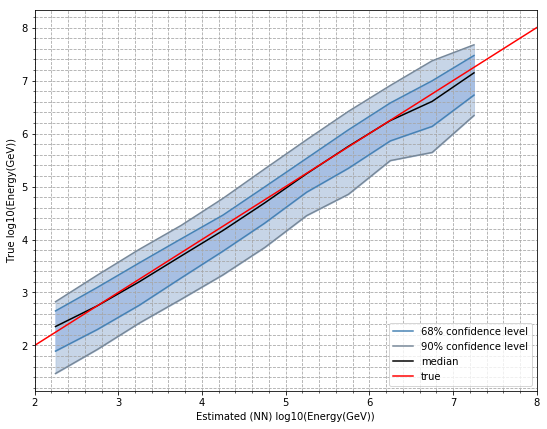

In [9]:
plot_performances(en_nn_true, 4, 15, coeff=0.5, xlabel="Estimated (NN) log10(Energy(GeV))", ylabel="True log10(Energy(GeV))")

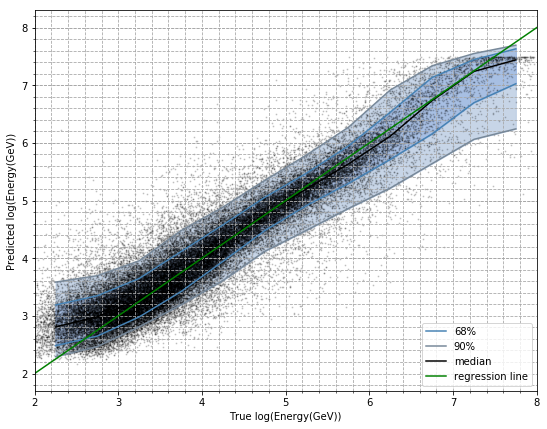

In [57]:
#predicted vs true energy
plt.figure(figsize=(9,7))
cl_68_nn = [binbounds(en_true_nn,x*0.5,(x+1)*0.5,0.68) for x in range(4,16)]
cl_90_nn = [binbounds(en_true_nn,x*0.5,(x+1)*0.5,0.90) for x in range(4,16)]
median_nn = [binbounds(en_true_nn,x*0.5,(x+1)*0.5,0) for x in range(4,16)]

line_68_1 = plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"steelblue", label="68%", alpha=1)
line_68_2 = plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"steelblue", alpha=1)
line_90_1 = plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"lightslategray", label="90%",alpha=1)
line_90_2 = plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"lightslategray",alpha=1)
median = plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
regr_line = plt.plot([2,8],[2,8],"g", label="regression line")

plt.fill_between([x[0] for x in cl_68_nn], [x[1]+x[0] for x in cl_68_nn], [x[2]+x[0] for x in cl_68_nn],
                color='cornflowerblue',alpha=0.7)
plt.fill_between([x[0] for x in cl_90_nn], [x[1]+x[0] for x in cl_90_nn], [x[2]+x[0] for x in cl_90_nn],
                color='lightsteelblue',alpha=0.7)


plt.scatter([x[0] for x in en_true_nn], [x[1] for x in en_true_nn], s=1, color='black', alpha=0.15)
plt.minorticks_on()
plt.xlim(2,8)
plt.legend(loc="lower right")
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.xlabel("True log(Energy(GeV))")
plt.ylabel("Predicted log(Energy(GeV))")
plt.show()

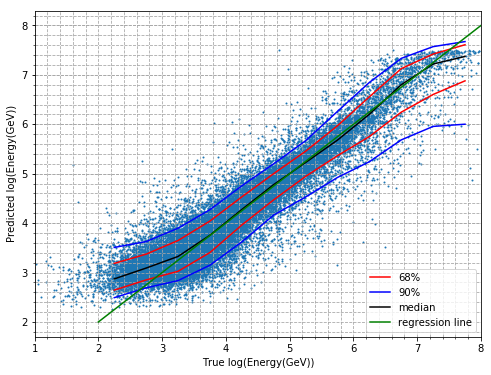

In [105]:
#nn energy
plt.figure(figsize=(8,6))
cl_68_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0.68) for x in range(4,16)]
cl_90_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0.90) for x in range(4,16)]
median_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0) for x in range(4,16)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r", label="68%")
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b", label="90%")
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
plt.plot([2,8],[2,8],"g", label="regression line")
plt.scatter([x[0] for x in en_nn], [x[1] for x in en_nn], s=1)
plt.minorticks_on()
plt.xlim(1,8)
plt.legend(loc="lower right")
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.xlabel("True log(Energy(GeV))")
plt.ylabel("Predicted log(Energy(GeV))")
plt.show()

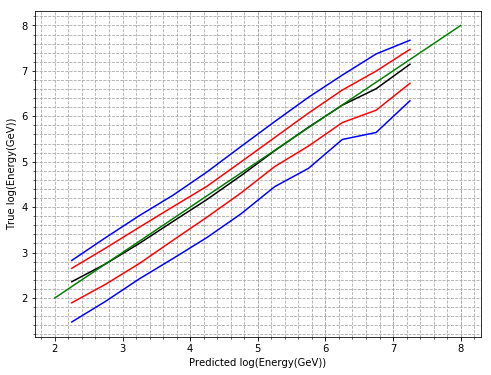

In [55]:
#nn estimated energy
cl_68_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
cl_90_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.figure(figsize=(8,6))
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k")
plt.plot([2,8],[2,8],"g")
plt.xlabel("Predicted log(Energy(GeV))")
plt.ylabel("True log(Energy(GeV))")
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

In [42]:
#numucc only

In [ ]:
energy_truth = []
with open("logE_numu_true.txt") as f:
    for line in f:
        energy_truth.append(float(line))
energy_nn = []
with open("logE_numu_pred.txt") as f:
    for line in f:
        energy_nn.append(float(line))
energy_reco = []
with open("logE_numu_reco.txt") as f:
    for line in f:        
        energy_reco.append(float(line))
energy_reco_corr = []
with open("logE_numu_reco_CORRECTED.txt") as f:
    for line in f:        
        energy_reco_corr.append(float(line))
        

In [10]:
energy_truth = np.loadtxt(os.path.join(FILES_DIR, "logE_numu_true.txt"))
energy_nn = np.loadtxt(os.path.join(FILES_DIR, "logE_numu_pred.txt"))
energy_reco = np.loadtxt(os.path.join(FILES_DIR, "logE_numu_reco.txt"))
energy_reco_corr = np.loadtxt(os.path.join(FILES_DIR, "logE_numu_reco_CORRECTED.txt"))

In [26]:
energy_reco

array([ 3.19979528,  3.98730366,  3.21628039, ...,  4.70326799,
        2.12430729,  4.11061013])

In [27]:
def correct_energy(x):
     return ((((((x<=1.0)*x)+(((x>1.0)and(x<=2.8))*(-(7.20045)+(x*3.01))))+(((x>2.8)and(x<=3.5))*(1081.22+(x*(-(1336.46)+(x*(614.871+(x*(-(124.755)+(x*9.43893))))))))))+(((x>3.5)and(x<=4.0))*(-(60.3619)+(x*(45.7012+(x*(-(11.0884)+(x*0.923034))))))))+(((x>4.0)and(x<7.0))*(-(8.72485)+(x*(5.16495+(x*(-(0.174627)+(x*(-(0.198979)+(x*(0.0385912+(x*-(0.00213019)))))))))))))+((x>7.0)*(0.375618+(x*1.01931)))

In [28]:
v_correct_energy = np.vectorize(correct_energy)

In [29]:
v_correct_energy(energy_reco)

array([ 2.59804605,  4.08617161,  2.6536576 , ...,  4.98390898,
       -0.80628506,  4.25319267])

In [30]:
energy_reco_corr

array([ 2.59804605,  4.08617161,  2.6536576 , ...,  4.98390898,
       -0.80628506,  4.25319267])

In [11]:
en_true_nn = list(zip(energy_truth, energy_nn))
en_true_reco = list(zip(energy_truth, energy_reco))
en_true_reco_corr = list(zip(energy_truth, energy_reco_corr))
en_nn_true = list(zip(energy_nn, energy_truth))
en_reco_true = list(zip(energy_reco, energy_truth))
en_reco_corr_true = list(zip(energy_reco_corr, energy_truth))

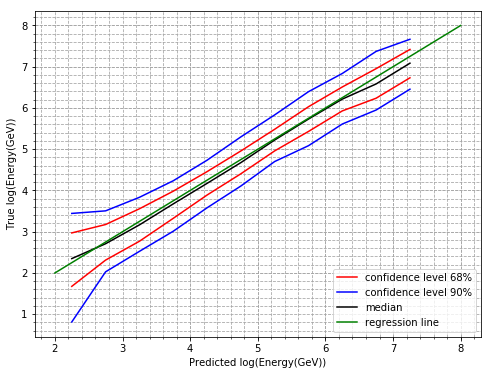

In [45]:
#nn estimated energy
plt.figure(figsize=(8,6))
cl_68_nn = [binbounds(en_nn_true,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
cl_90_nn = [binbounds(en_nn_true, x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_nn = [binbounds(en_nn_true ,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r", label='confidence level 68%')
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b", label='confidence level 90%')
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label='median')
plt.plot([2,8],[2,8],"g", label='regression line')
plt.minorticks_on()
plt.xlabel("Predicted log(Energy(GeV))")
plt.ylabel("True log(Energy(GeV))")
plt.legend(loc='lower right')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

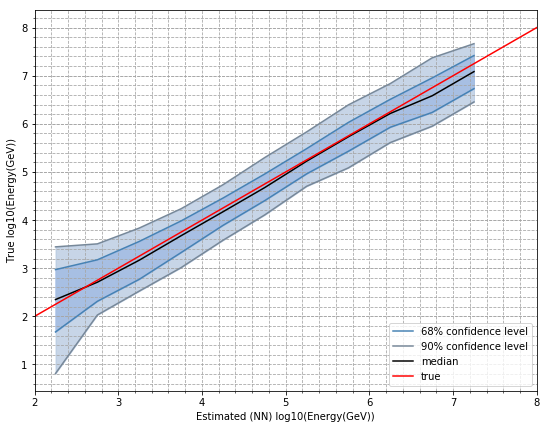

In [12]:
plot_performances(en_nn_true, 4, 15, coeff=0.5, xlabel="Estimated (NN) log10(Energy(GeV))", ylabel="True log10(Energy(GeV))")

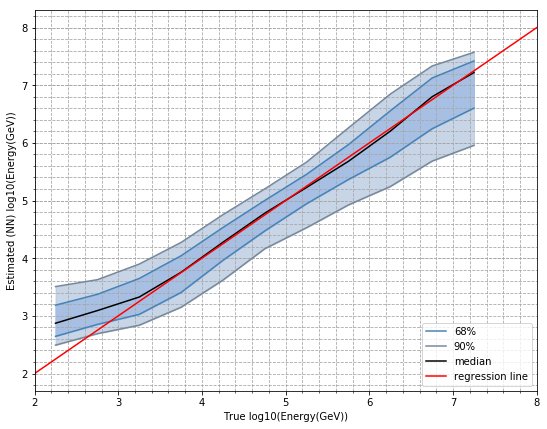

In [49]:
plot_performances(en_true_nn, 4,15,xlabel="True log10(Energy(GeV))", ylabel="Estimated (NN) log10(Energy(GeV))")

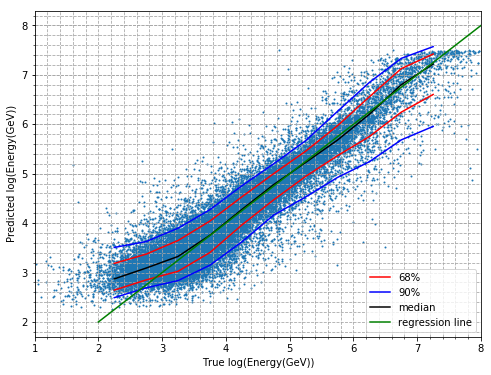

In [100]:
#nn estimated energy
plt.figure(figsize=(8,6))
cl_68_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
cl_90_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_nn = [binbounds(en_nn,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r", label='68%')
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b", label='90%')
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label='median')
plt.plot([2,8],[2,8],"g", label='regression line')
plt.scatter([x[0] for x in en_nn], [x[1] for x in en_nn], s=1)
plt.xlim(1,8)
plt.minorticks_on()
plt.xlabel("True log(Energy(GeV))")
plt.ylabel("Predicted log(Energy(GeV))")
plt.legend(loc='lower right')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

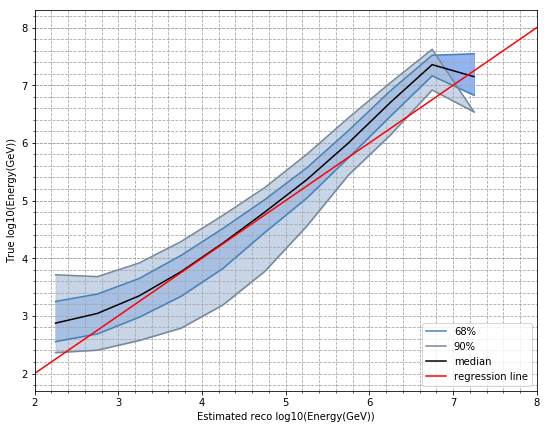

In [55]:
plot_performances(en_reco_true, 4, 15, "Estimated reco log10(Energy(GeV))", "True log10(Energy(GeV))")

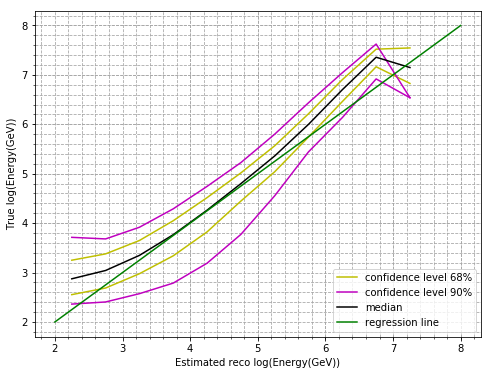

In [85]:
#reco estimated energy
plt.figure(figsize=(8,6))
cl_68_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
cl_90_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_reco],[x[1]+x[0] for x in cl_68_reco],"y")
plt.plot([x[0] for x in cl_68_reco],[x[2]+x[0] for x in cl_68_reco],"y",label='confidence level 68%')
plt.plot([x[0] for x in cl_90_reco],[x[1]+x[0] for x in cl_90_reco],"m",label='confidence level 90%')
plt.plot([x[0] for x in cl_90_reco],[x[2]+x[0] for x in cl_90_reco],"m")
plt.plot([x[0] for x in median_reco],[x[2]+x[0] for x in median_reco],"k", label='median')
plt.plot([2,8],[2,8],"g", label='regression line')
plt.minorticks_on()
plt.xlabel("Estimated reco log(Energy(GeV))")
plt.ylabel("True log(Energy(GeV))")
plt.legend(loc='lower right')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

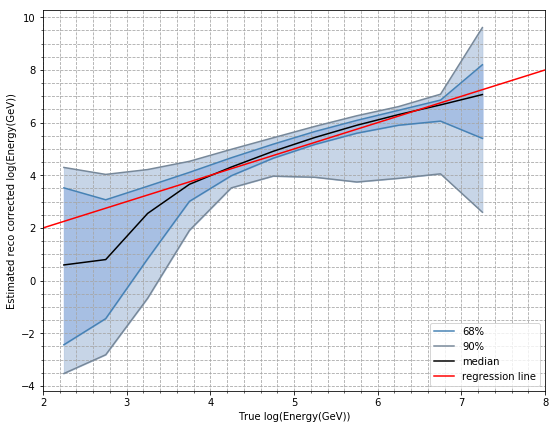

In [56]:
plot_performances(en_true_reco_corr, 4, 15, "True log(Energy(GeV))", ylabel="Estimated reco corrected log(Energy(GeV))")

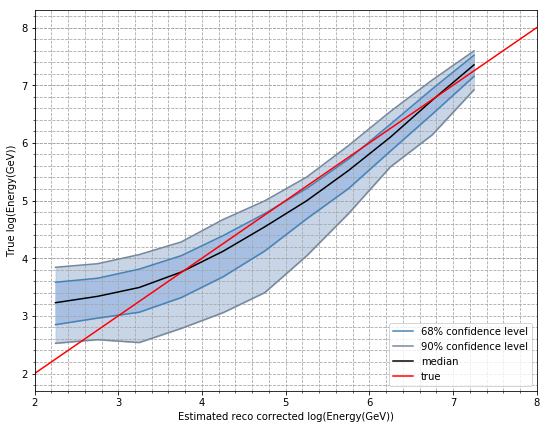

In [25]:
plot_performances(en_reco_corr_true, 4, 15, xlabel="Estimated reco corrected log(Energy(GeV))", ylabel="True log(Energy(GeV))")

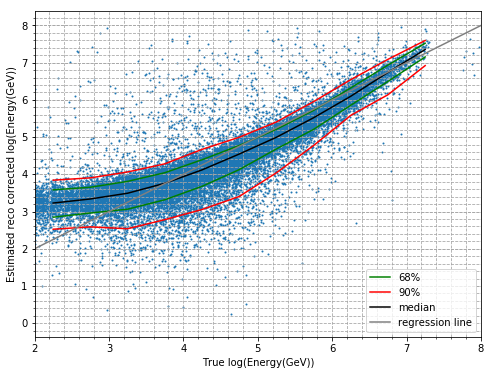

In [116]:
#reco estimated energy
plt.figure(figsize=(8,6))
cl_68_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
cl_90_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_reco_corr],[x[1]+x[0] for x in cl_68_reco_corr],"g", label='68%')
plt.plot([x[0] for x in cl_68_reco_corr],[x[2]+x[0] for x in cl_68_reco_corr],"g")
plt.plot([x[0] for x in cl_90_reco_corr],[x[1]+x[0] for x in cl_90_reco_corr],"r",label='90%')
plt.plot([x[0] for x in cl_90_reco_corr],[x[2]+x[0] for x in cl_90_reco_corr],"r")
plt.plot([x[0] for x in median_reco_corr],[x[2]+x[0] for x in median_reco_corr],"k", label='median')
plt.plot([2,8],[2,8],"gray", label="regression line")
plt.xlim(2,8)
plt.scatter([x[0] for x in en_est_reco_corr], [x[1] for x in en_est_reco_corr], s=1)

plt.minorticks_on()
plt.xlabel("True log(Energy(GeV))")
plt.ylabel("Estimated reco corrected log(Energy(GeV))")
plt.legend(loc='lower right')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

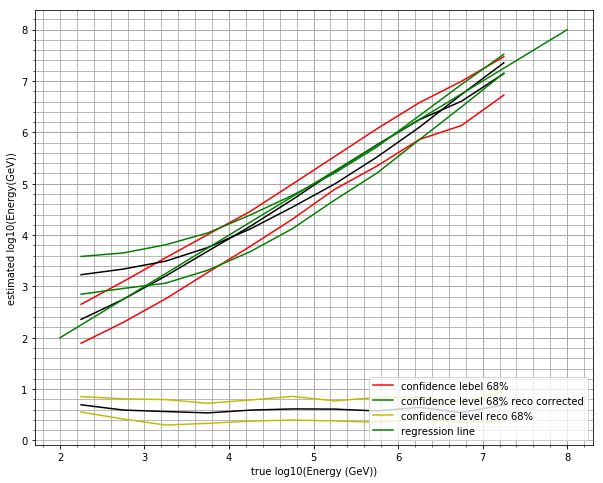

In [67]:
#nn estimated energy
plt.figure(figsize=(10,8))
cl_68_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
#cl_90_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_nn = [binbounds(en_est_nn,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r", label="confidence lebel 68%")
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r")
#plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b")
#plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k")
cl_68_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
#cl_90_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_reco_corr = [binbounds(en_est_reco_corr,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_reco],[x[1]+x[0] for x in cl_68_reco_corr],"g", label="confidence level 68% reco corrected")
plt.plot([x[0] for x in cl_68_reco],[x[2]+x[0] for x in cl_68_reco_corr],"g")
#plt.plot([x[0] for x in cl_90_reco],[x[1]+x[0] for x in cl_90_reco_corr],"c")
#plt.plot([x[0] for x in cl_90_reco],[x[2]+x[0] for x in cl_90_reco_corr],"c")
plt.plot([x[0] for x in median_reco],[x[2]+x[0] for x in median_reco_corr],"k")
cl_68_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0.68) for x in range(4,15)]
#cl_90_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0.90) for x in range(4,15)]
median_reco = [binbounds(en_est_reco,x*0.5,(x+1)*0.5,0) for x in range(4,15)]
plt.plot([x[0] for x in cl_68_reco],[x[1]+x[0] for x in cl_68_reco],"y", label="confidence level reco 68%")
plt.plot([x[0] for x in cl_68_reco],[x[2]+x[0] for x in cl_68_reco],"y")
#plt.plot([x[0] for x in cl_90_reco],[x[1]+x[0] for x in cl_90_reco],"m")
#plt.plot([x[0] for x in cl_90_reco],[x[2]+x[0] for x in cl_90_reco],"m")
plt.plot([x[0] for x in median_reco],[x[2]+x[0] for x in median_reco],"k")
plt.plot([2,8],[2,8],"g", label="regression line")
plt.legend(loc="lower right")
plt.xlabel("true log10(Energy (GeV))")
plt.ylabel("estimated log10(Energy(GeV))")
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

### cos_z

In [8]:
cos_z_truth = []
with open("true_cosz.txt") as f:
    for line in f:
        cos_z_truth.append(float(line))
cos_z_nn = []
with open("predicted_cosz.txt") as f:
    for line in f:
        cos_z_nn.append(float(line))
cosz_nn = list(list(zip(cos_z_truth, cos_z_nn))[:])

In [13]:
cosz_true = np.loadtxt(os.path.join(FILES_DIR, "true_cosz.txt"))
cosz_nn = np.loadtxt(os.path.join(FILES_DIR, "predicted_cosz.txt"))
cosz_true_nn = list(zip(cosz_true, cosz_nn))
cosz_nn_true = list(zip(cosz_nn, cosz_true))

In [14]:
len(cosz_nn)

51818

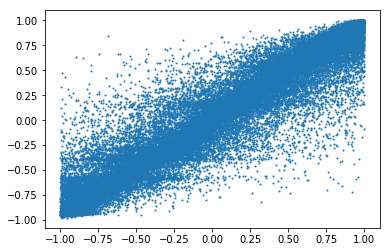

In [130]:
plt.scatter([x[0] for x in cosz_true_nn], [x[1] for x in cosz_true_nn], s=1)
plt.show()

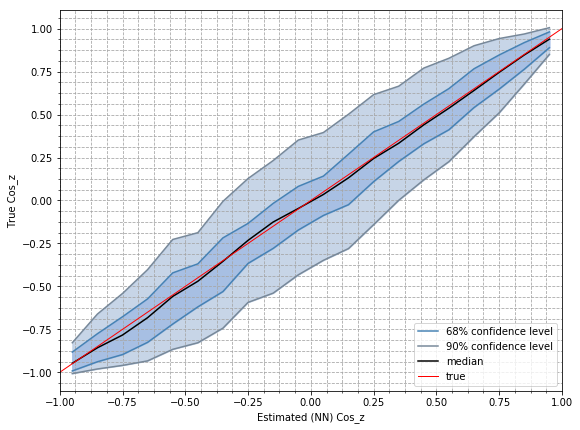

In [16]:
plot_performances_cosz(cosz_nn_true, -10,10, coeff=0.1, xlabel="Estimated (NN) Cos_z", ylabel="True Cos_z")

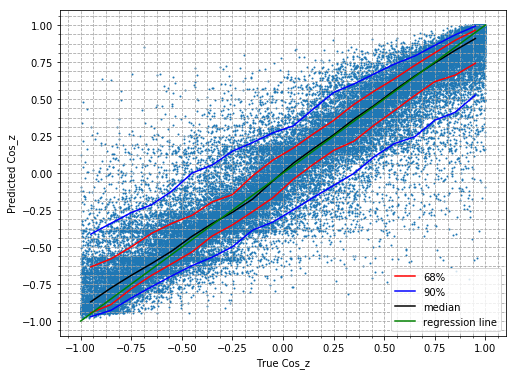

In [102]:
#nn cosz
plt.figure(figsize=(8,6))
cl_68_nn = [binbounds(cosz_nn,x*0.10,(x+1)*0.10,0.68) for x in range(-10,10)]
cl_90_nn = [binbounds(cosz_nn,x*0.10,(x+1)*0.10,0.90) for x in range(-10,10)]
median_nn = [binbounds(cosz_nn,x*0.10,(x+1)*0.10,0.0) for x in range(-10,10)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r",label='68%')
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b",label='90%')
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label='median')
plt.plot([-1,1],[-1,1],"g", label='regression line')
plt.scatter([x[0] for x in cosz_nn], [x[1] for x in cosz_nn], s=1)
plt.minorticks_on()
plt.legend(loc="lower right")
plt.xlabel("True Cos_z")
plt.ylabel("Predicted Cos_z")

plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

### CosZ reco numu

In [51]:
cos_z_numu_truth = []
with open("cosz_numu_true.txt") as f:
    for line in f:
        cos_z_numu_truth.append(float(line))
cos_z_numu_nn = []
with open("cosz_numu_pred.txt") as f:
    for line in f:
        cos_z_numu_nn.append(float(line))
cos_z_numu_reco = []
with open("cosz_numu_reco.txt") as f:
    for line in f:        
        cos_z_numu_reco.append(float(line))
cosz_numu_nn = list(list(zip(cos_z_numu_truth, cos_z_numu_nn))[:])

cosz_numu_reco = list(list(zip(cos_z_numu_truth, cos_z_numu_reco))[:])

In [17]:
cosz_numu_true = np.loadtxt(os.path.join('.','reco_comparison', "cosz_numu_true.txt"))
cosz_numu_nn = np.loadtxt(os.path.join('.', 'reco_comparison', "cosz_numu_pred.txt"))
cosz_numu_reco = np.loadtxt(os.path.join('.','reco_comparison', "cosz_numu_reco.txt"))

cosz_numu_true_nn = list(zip(cosz_numu_true, cosz_numu_nn))
cosz_numu_true_reco = list(zip(cosz_numu_true, cosz_numu_reco))

cosz_numu_nn_true = list(zip(cosz_numu_nn, cosz_numu_true))
cosz_numu_reco_true = list(zip(cosz_numu_reco, cosz_numu_true))

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(cosz_numu_true, cosz_numu_reco)

0.034132191771554889

In [20]:
mean_squared_error(cosz_numu_true, cosz_numu_nn)

0.012890577183312548

In [78]:
import numpy as np

In [64]:
acos_z_numu_truth = np.asarray(cos_z_numu_truth)
acos_z_numu_reco = np.asarray(cos_z_numu_reco)

In [65]:
nonz = np.nonzero(acos_z_numu_reco)[0]

In [66]:
acos_z_numu_reco_nz = acos_z_numu_reco[nonz]

In [67]:
acos_z_numu_truth_nz = acos_z_numu_truth[nonz]

In [68]:
cosz_numu_reco_nz = list(list(zip(acos_z_numu_truth_nz, acos_z_numu_reco_nz))[:])

In [70]:
mean_squared_error(acos_z_numu_truth_nz,acos_z_numu_reco_nz )

0.030089546211870728

In [15]:
def plot_performances_cosz(values_list, range_ext_1, range_ext_2, coeff = 0.5,  xlabel="True log(Energy(GeV))", ylabel="Predicted log(Energy(GeV))"):
    plt.figure(figsize=(9,7))
    cl_68_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.68) for x in range(range_ext_1,range_ext_2)]
    cl_90_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.90) for x in range(range_ext_1,range_ext_2)]
    median_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0) for x in range(range_ext_1,range_ext_2)]

    line_68_1 = plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"steelblue", label="68% confidence level", alpha=1)
    line_68_2 = plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"steelblue", alpha=1)
    line_90_1 = plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"lightslategray", label="90% confidence level",alpha=1)
    line_90_2 = plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"lightslategray",alpha=1)
    median = plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
    regr_line = plt.plot([-1,1],[-1,1],"r", label='true', lw=1)

    plt.fill_between([x[0] for x in cl_68_nn], [x[1]+x[0] for x in cl_68_nn], [x[2]+x[0] for x in cl_68_nn],
                color='cornflowerblue',alpha=0.7)
    plt.fill_between([x[0] for x in cl_90_nn], [x[1]+x[0] for x in cl_90_nn], [x[2]+x[0] for x in cl_90_nn],
                color='lightsteelblue',alpha=0.7)


    #plt.scatter([x[0] for x in values_list], [x[1] for x in values_list], s=1, 
    #            marker='o', color='black', edgecolor='k', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(-1,1)
    plt.legend(loc="lower right")
    plt.grid(b=True, which='both', color='0.65', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

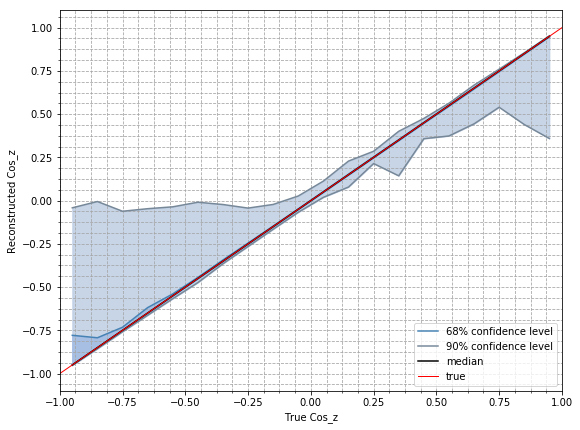

In [21]:
plot_performances_cosz(cosz_numu_true_reco, -10,10, coeff=0.1, xlabel="True Cos_z", ylabel="Reconstructed Cos_z")

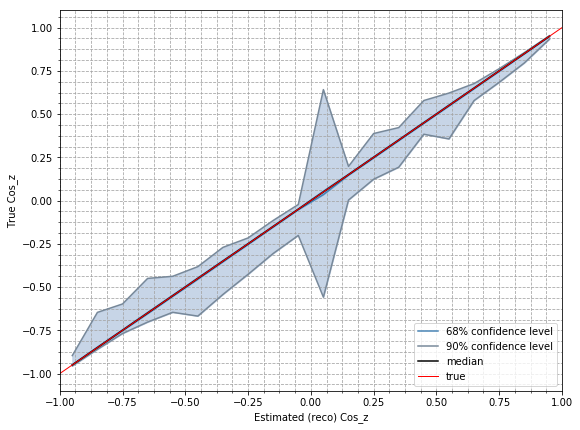

In [22]:
plot_performances_cosz(cosz_numu_reco_true,-10,10, coeff=0.1, xlabel="Estimated (reco) Cos_z", ylabel="True Cos_z")

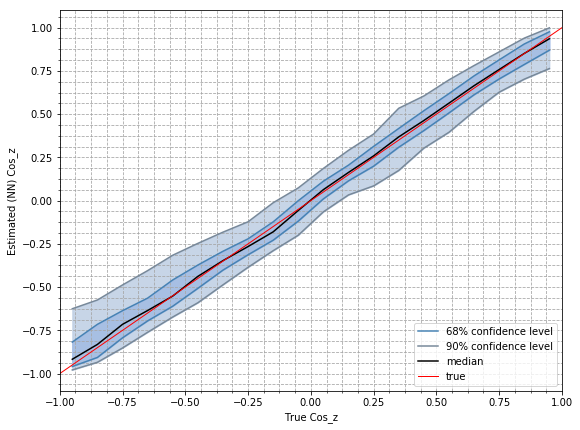

In [23]:
plot_performances_cosz(cosz_numu_true_nn,-10,10, coeff=0.1, xlabel="True Cos_z", ylabel="Estimated (NN) Cos_z")

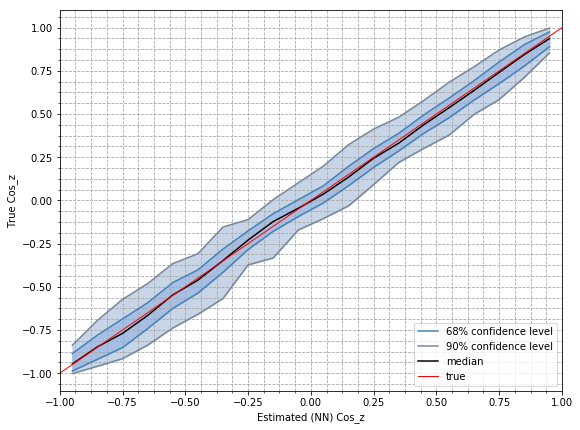

In [24]:
plot_performances_cosz(cosz_numu_nn_true,-10,10, coeff=0.1, xlabel="Estimated (NN) Cos_z", ylabel="True Cos_z")

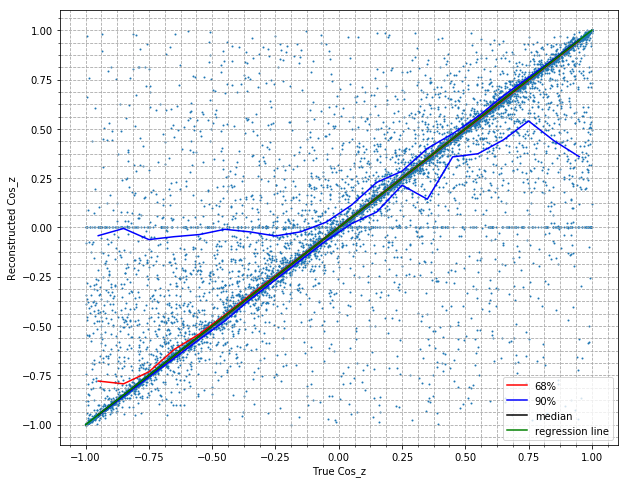

In [80]:
#nn cosz numu reco
plt.figure(figsize=(10,8))
cl_68_reco = [binbounds(cosz_numu_true_reco,x*0.10,(x+1)*0.10,0.68) for x in range(-10,10)]
cl_90_reco = [binbounds(cosz_numu_true_reco,x*0.10,(x+1a)*0.10,0.90) for x in range(-10,10)]
median_reco = [binbounds(cosz_numu_true_reco,x*0.10,(x+1)*0.10,0.0) for x in range(-10,10)]
plt.plot([x[0] for x in cl_68_reco],[x[1]+x[0] for x in cl_68_reco],"r",label='68%')
plt.plot([x[0] for x in cl_68_reco],[x[2]+x[0] for x in cl_68_reco],"r")
plt.plot([x[0] for x in cl_90_reco],[x[1]+x[0] for x in cl_90_reco],"b",label='90%')
plt.plot([x[0] for x in cl_90_reco],[x[2]+x[0] for x in cl_90_reco],"b")
plt.plot([x[0] for x in median_reco],[x[2]+x[0] for x in median_reco],"k", label='median')
plt.plot([-1,1],[-1,1],"g", label='regression line')
plt.scatter([x[0] for x in cosz_numu_true_reco], [x[1] for x in cosz_numu_true_reco], s=1)
plt.minorticks_on()
plt.legend(loc="lower right")
plt.xlabel("True Cos_z")
plt.ylabel("Reconstructed Cos_z")

plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

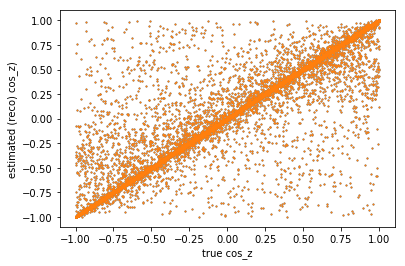

In [79]:
plt.scatter([x[0] for x in cosz_numu_reco_nz], [x[1] for x in cosz_numu_reco_nz], s=1)
plt.xlabel("true cos_z")
plt.ylabel("estimated (reco) cos_z)")
plt.show()

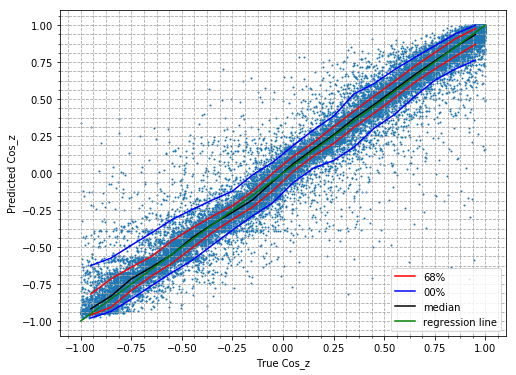

In [104]:
#cosz numu NN
plt.figure(figsize=(8,6))
cl_68_nn = [binbounds(cosz_numu_nn,x*0.10,(x+1)*0.10,0.68) for x in range(-10,10)]
cl_90_nn = [binbounds(cosz_numu_nn,x*0.10,(x+1)*0.10,0.90) for x in range(-10,10)]
median_nn = [binbounds(cosz_numu_nn,x*0.10,(x+1)*0.10,0.0) for x in range(-10,10)]
plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"r",label='68%')
plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"r")
plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"b",label='00%')
plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"b")
plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label='median')
plt.plot([-1,1],[-1,1],"g", label='regression line')
plt.scatter([x[0] for x in cosz_numu_nn], [x[1] for x in cosz_numu_nn], s=1)
plt.minorticks_on()
plt.legend(loc="lower right")
plt.xlabel("True Cos_z")
plt.ylabel("Predicted Cos_z")

plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.show()

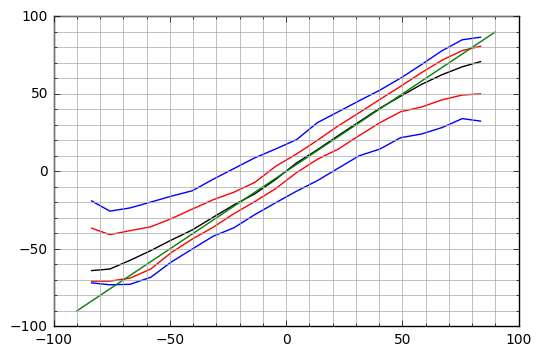

In [94]:
#nn arccosz
cl_68_nn = [binbounds(cosz_nn,math.sin(x*9/180*math.pi),math.sin((x+1)*9/180*math.pi),0.68) for x in range(-10,10)]
cl_90_nn = [binbounds(cosz_nn,math.sin(x*9/180*math.pi),math.sin((x+1)*9/180*math.pi),0.90) for x in range(-10,10)]
median_nn = [binbounds(cosz_nn,math.sin(x*9/180*math.pi),math.sin((x+1)*9/180*math.pi),0.0) for x in range(-10,10)]
plt.plot([math.asin(x[0])*180/math.pi for x in cl_68_nn],[math.asin(x[1]+x[0])*180/math.pi for x in cl_68_nn],"r")
plt.plot([math.asin(x[0])*180/math.pi for x in cl_68_nn],[math.asin(x[2]+x[0])*180/math.pi for x in cl_68_nn],"r")
plt.plot([math.asin(x[0])*180/math.pi for x in cl_90_nn],[math.asin(x[1]+x[0])*180/math.pi for x in cl_90_nn],"b")
plt.plot([math.asin(x[0])*180/math.pi for x in cl_90_nn],[math.asin(x[2]+x[0])*180/math.pi for x in cl_90_nn],"b")
plt.plot([math.asin(x[0])*180/math.pi for x in median_nn],[math.asin(x[2]+x[0])*180/math.pi for x in median_nn],"k")
plt.plot([-90,90],[-90,90],"g")
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()